# Mall Customers Grouping

Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('./dataset/Mall_Customers.csv')
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


**Plotting Data**

In [13]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

In [14]:
grid = GridSearchCV(KMeans(), param_grid={'n_clusters': np.arange(1, 10)}, cv=5)

In [21]:
X_train = df.drop(columns=["CustomerID", "Gender"]).values
grid.fit(X_train)
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_clusters,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008318,0.002019,0.006916,0.001400,1,{'n_clusters': 1},-133296.707812,-31385.770313,-14396.162500,-59398.656250,-142025.028125,-76100.465000,52351.186230,9
1,0.006951,0.000954,0.009763,0.003038,2,{'n_clusters': 2},-116579.566083,-38930.842279,-25469.820791,-68280.016667,-110317.104275,-71915.470019,36682.332290,8
2,0.004744,0.002697,0.004733,0.004579,3,{'n_clusters': 3},-89169.572562,-17202.686747,-40050.963836,-62140.535579,-77850.353632,-57282.822471,25948.949026,7
3,0.006712,0.001935,0.002015,0.002552,4,{'n_clusters': 4},-81087.732924,-24150.063206,-39689.796050,-29307.161711,-58656.919359,-46578.334650,20907.240452,6
4,0.006375,0.003513,0.003060,0.003316,5,{'n_clusters': 5},-81926.528958,-23146.280992,-20928.092593,-27896.941392,-55358.270099,-41851.222807,23540.793044,5
5,0.005196,0.003179,0.003140,0.002988,6,{'n_clusters': 6},-81046.532575,-15790.089592,-20024.676208,-27412.263298,-37140.327562,-36282.777847,23526.543724,4
6,0.003625,0.004762,0.006361,0.002953,7,{'n_clusters': 7},-63845.885935,-15790.089592,-22466.827163,-20717.309387,-37140.327562,-31992.087928,17444.338868,3
7,0.005853,0.003326,0.002570,0.003499,8,{'n_clusters': 8},-58137.445409,-15959.490783,-16722.054149,-25922.909048,-37237.011818,-30795.782241,15690.673937,2
8,0.005303,0.003554,0.004620,0.003874,9,{'n_clusters': 9},-61740.714373,-16040.564444,-15077.592593,-17300.077202,-36375.312130,-29306.852149,18025.245668,1


In [23]:
y_pred = grid.best_estimator_.predict(X_train)
df["cluster"] = y_pred
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1,19,15,39,7
1,2,1,21,15,81,6
2,3,0,20,16,6,7
3,4,0,23,16,77,6
4,5,0,31,17,40,7
...,...,...,...,...,...,...
195,196,0,35,120,79,3
196,197,0,45,126,28,8
197,198,1,32,126,74,3
198,199,1,32,137,18,8


**Plotting Clusters**

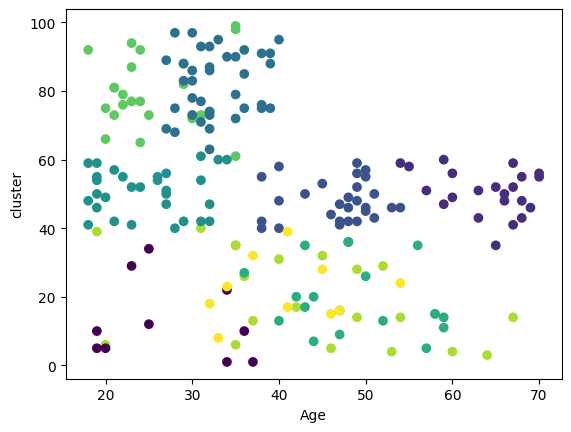

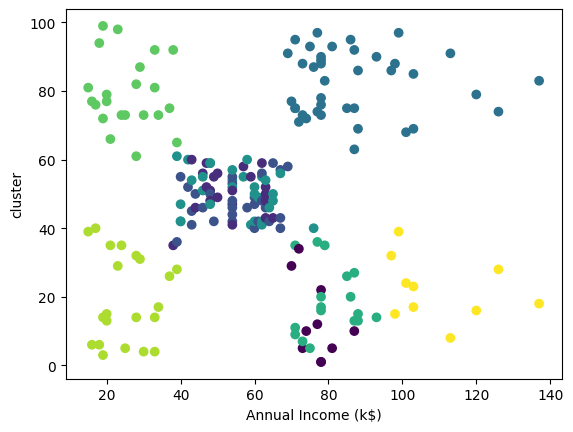

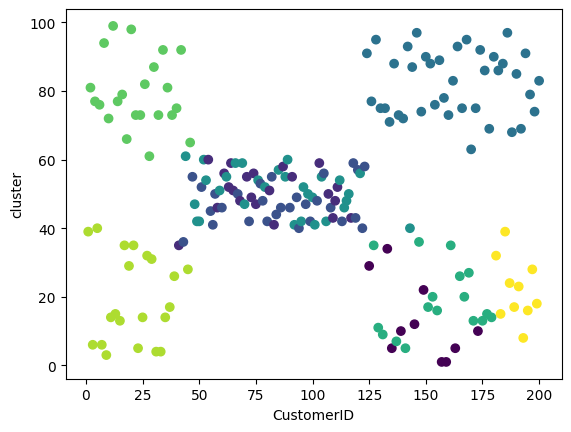

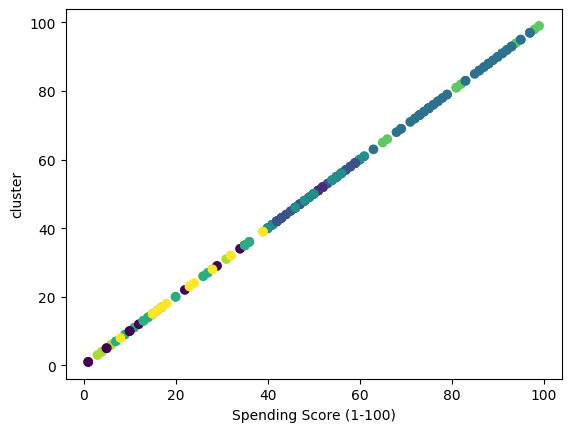

In [33]:
for feature in df.columns.difference(["cluster", "Gender"]):
    # plt.scatter(df[feature], df["cluster"], c=df["cluster"])
    plt.scatter(df[feature], df["Spending Score (1-100)"], c=df["cluster"])
    plt.xlabel(feature)
    plt.ylabel("cluster")
    plt.show()
